# Introduction



As the entertainment industry surges and major corporations dive into original video content, a new company is poised to enter the competitive world of movie-making. Recognizing the complexities of the film business, especially for newcomers, the company seeks to establish a strong foundation by understanding current box office trends and transforming these insights into a strategic roadmap for their new studio.

To ensure a successful start, the company has enlisted our help as Group 7 members to identify which types of films are currently performing well at the box office and translate these findings into actionable recommendations.

# Business Understanding

The Business objective is to identify which film genres will consistently bring in the most revenue for this new studio.  There are many elements that contribute to a film's success and our goal is to analyze these factors through Exploratory Data Analysis (EDA) and linear regression. This will allow us to uncover trends and connections that will guide the studio's production choices. 

Ultimately, we want to translate these insights into actionable recommendations that will help the studio create films that captivate audiences and turn a profit.

# Objectives

## Main Objectives

1.To determine which types of films are performing best at the box office.

2.To identify key factors that contribute to a film's success.

##    Specific Objectives

1.Investigate key variables such as production budgets, domestic and worldwide gross revenues, release years, and genres.

2.Develop predictive models to determine factors significantly impacting box office performance.

3.To investigate the relationship between production budget and box office revenue.

4.To examine the impact of release timing on a film's success.

5.To provide data-driven recommendations for film production and release strategies.

# Data Understanding

In this analysis, we will use a datasets from:

    1.Box Office 
    2.IMDB
    3.Rotten Tomatoes
    4. The Movie
    5. The Numbers

The data containsning information about various films, including their genres, budgets, box office revenues, and release dailic.
Understanding the structure and contents of our data will be the first step in uncovering the insights needed to guide our new movie studio's strategy.

### Importing the necesarry libraries

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

In [2]:
TN_df= pd.read_csv("./Data/tn.movie_budgets.csv", index_col= 0)

# The Numbers Movie Budgets dataframe

### Initial Data Inspection

Getting a preview of the first 10 rows

In [3]:
TN_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Getting basic information about the whole dataset

In [4]:
TN_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [5]:
TN_df.describe()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Home,"$20,000,000",$0,$0
freq,24,3,231,548,367


In [6]:
TN_df.shape

(5782, 5)

# Data wrangling

#### Handling missing values

In [7]:
# Checking for missing values
TN_df.isnull().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no missing values in this dataframe

#### Cleaning of the release date column.

In [8]:
# Getting a preview of the first 5 rows of the "release_date" column
TN_df["release_date"].head()

id
1    Dec 18, 2009
2    May 20, 2011
3     Jun 7, 2019
4     May 1, 2015
5    Dec 15, 2017
Name: release_date, dtype: object

For my analysis it would be more helpful to split this data into release month and release year.

In [9]:
# Converting the release_date column to datetime format
TN_df["release_date"] = pd.to_datetime(TN_df["release_date"])

# Creating new columns for "release_year" and "release_month" by splitting the "release_date" column
TN_df["release_year"]= TN_df["release_date"].dt.year
TN_df["release_month"]= TN_df["release_date"].dt.month

# Preview of the first 3 rows of the resulting  dataframe
TN_df.head(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
id,,,,,,,
1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,12
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,5
3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,6


Now that we have split the release date in year and months we no longer have use for the release date column, hence we will drop it from the dataframe.

In [10]:
# Dropping the "release_date" column
TN_df = TN_df.drop(columns ="release_date", axis=1)
TN_df.head(3)

,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
id,,,,,,
1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,12
2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,5
3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,6


#### Cleaning the movie column

Checking to see if there are duplicates. All the values in the "movie" column should be unique.

In [11]:
# Getting info about the movie column
TN_df["movie"].describe()

count     5782
unique    5698
top       Home
freq         3
Name: movie, dtype: object

The number of unique values not being equal to the total count of values shows that there are some duplicates in the movie column. The difference between the total counts and the unique values shows that there are 84 duplicated values. Below we check for duplicates and drop rows where the movie column has duplicate values.

In [12]:
# Creating a dataframe that combines rows where the movie column has duplicate values in the TN_df dataframe.

duplicate_movies = TN_df[TN_df.duplicated(subset='movie')]

# Getting a preview of the duplicated rows

duplicate_movies

,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
id,,,,,,
74,Godzilla,"$125,000,000","$136,314,294","$376,000,000",1998,5
9,Robin Hood,"$99,000,000","$30,824,628","$84,747,441",2018,11
85,Fantastic Four,"$87,500,000","$154,696,080","$333,132,750",2005,7
44,The Mummy,"$80,000,000","$155,385,488","$416,385,488",1999,5
8,Hercules,"$70,000,000","$99,112,101","$250,700,000",1997,6
...,...,...,...,...,...,...
69,Cat People,"$134,000","$4,000,000","$8,000,000",1942,11
77,Night of the Living Dead,"$114,000","$12,087,064","$30,087,064",1968,10
78,The Birth of a Nation,"$110,000","$10,000,000","$11,000,000",1915,2


In [13]:
# Dropping rows where the movie column has duplicated values.

TN_df = TN_df.drop_duplicates(subset = ['movie'])

# Check if the changes have been implemented the new number of rows should now be 5698

TN_df.shape

(5698, 6)

#### Cleaning the production_budget, domestic_gross and world_wide gross columns

These columns represent financial figures thus it is important that we work with them in integer or float format to allow us to carry out mathematical functions on them.

In [14]:
# Checking their datatypes
TN_df.dtypes

movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
release_year          int32
release_month         int32
dtype: object

Since the three columns have object data types, we will convert them into integer format.

In [15]:
# Removing the commas and dollar signs from the columns

TN_df['production_budget'] = TN_df['production_budget'].replace('[\$,]','', regex=True)
TN_df['worldwide_gross'] = TN_df['worldwide_gross'].replace('[\$,]','', regex=True)
TN_df['domestic_gross'] = TN_df['domestic_gross'].replace('[\$,]','', regex=True)

# Converting the columns into integers
TN_df['production_budget'] = TN_df['production_budget'].astype("int64")
TN_df['worldwide_gross'] = TN_df['worldwide_gross'].astype("int64")
TN_df['domestic_gross'] = TN_df['domestic_gross'].astype("int64")

# Previewing the results, looking at the first 3 rows
TN_df.head(3)

,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
id,,,,,,
1,Avatar,425000000,760507625,2776345279,2009,12
2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5
3,Dark Phoenix,350000000,42762350,149762350,2019,6


The data showing that there were movies that did not generate any revenue at all could be a sign that data was entered incorrectly. Hence we shall drop all rows where the world_wide gross is 0.

In [16]:
# Retaining rows where the values in the world_wide gross is greater than zero
TN_df = TN_df[TN_df['worldwide_gross'] > 0]

# checking that the zero values have been dropped.
assert (TN_df['worldwide_gross'] == 0).sum() == 0


Creating a profit column to allow us to access the profitability of each movie.




In [17]:
# Creating a profit column by subtracting the  production_budget from the worldwide_gross
TN_df["profit"] = (TN_df['worldwide_gross'] - TN_df['production_budget'])

# preview of the resultant dataframe
TN_df.head()


,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit
id,,,,,,,
1,Avatar,425000000,760507625,2776345279,2009,12,2351345279
2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,635063875
3,Dark Phoenix,350000000,42762350,149762350,2019,6,-200237650
4,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,1072413963
5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12,999721747


In [18]:
if np.isinf(TN_df['production_budget']).any():
    print("Infinite values detected in production_budget. Replacing with NaN.")
    TN_df['production_budget'].replace([np.inf, -np.inf], np.nan, inplace=True)
    TN_df.dropna(subset=['production_budget'], inplace=True)
else:
    print("No infinite values detected in production_budget.")


No infinite values detected in production_budget.


# Exploratory Data Analysis

## Univariate Analysis

### Production budget<br>
A univariate analysis of the production budget will help provide a clear picture of the budget distribution within the film industry.

/home/ikn/miniforge3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


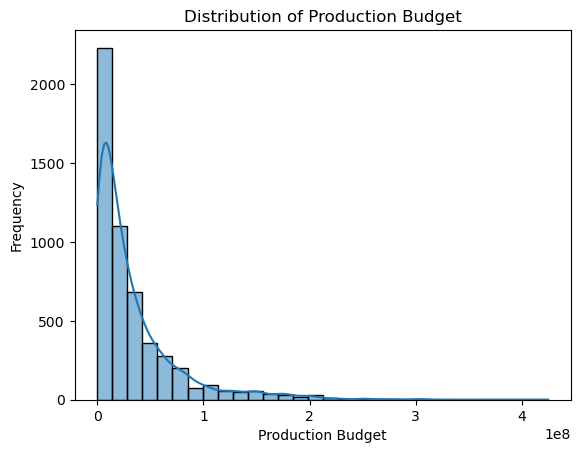

In [19]:
# Histogram
sns.histplot(TN_df['production_budget'], bins=30, kde=True)
plt.title('Distribution of Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('Frequency');

# Bivariate analysis

### Production Budget vs Profit<br>
This analysis directly shows how investment (budget) translates into financial returns (profit), and will help inform future budget allocation decisions.

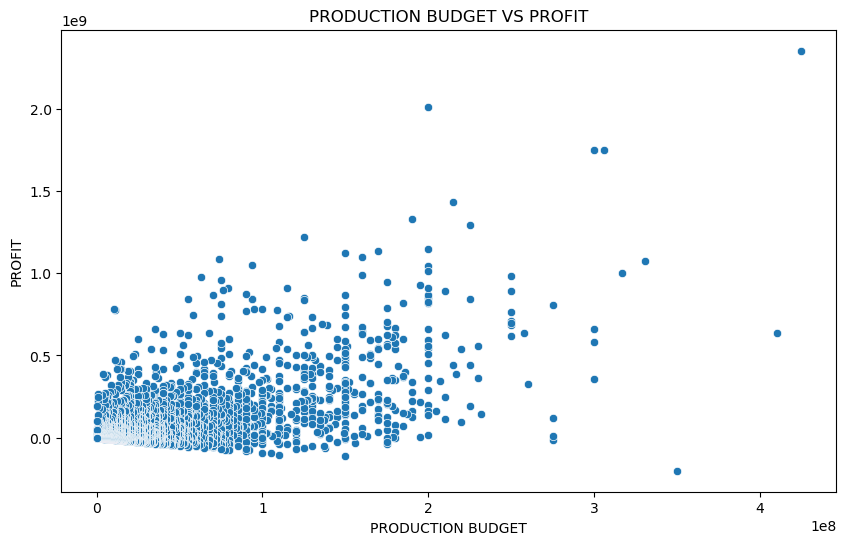

In [20]:
# Creating the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='profit', data=TN_df)
plt.title('PRODUCTION BUDGET VS PROFIT')
plt.xlabel('PRODUCTION BUDGET')
plt.ylabel('PROFIT');

# Displaying the plot
plt.show()

From the plot you can see that as the production budget increases the profit tends to increase as well. As the budget continues to increase, the frequency  declines, showing that High-budget productions are much less common.

# Release month vs profit

This analysis may help investors make informed decisions about when to release films for potential profit maximization.

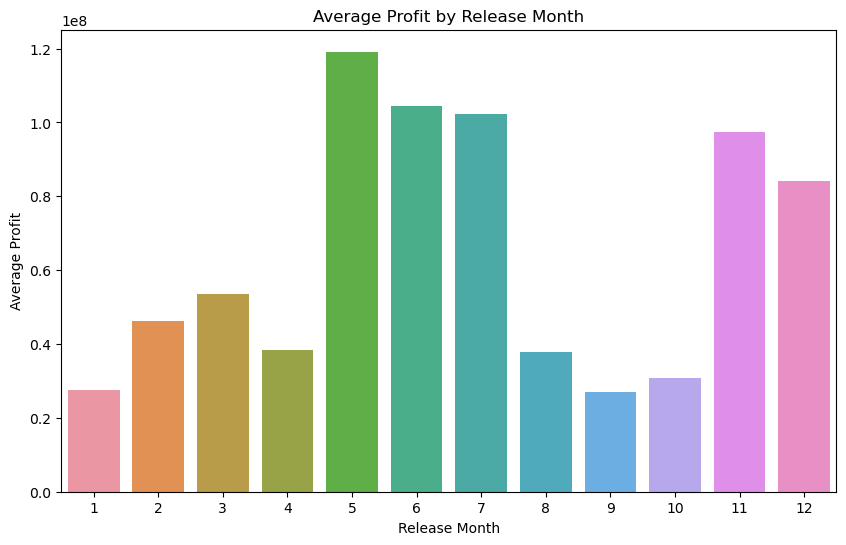

In [21]:
# Aggregating profit by release month
monthly_profit = TN_df.groupby('release_month')['profit'].mean().reset_index()

# Plotting the aggregated data
plt.figure(figsize=(10, 6))
sns.barplot(x='release_month', y='profit', data=monthly_profit,)
plt.title('Average Profit by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Profit')

# Displaying the plot
plt.show()


The highest average profits appear to be in months 5 (May), 6 (June), and 7 (July), with May being the peak. This suggests that summer releases tend to be more profitable on average.
There are noticeable increases in months 11 (November) and 12 (December), indicating higher profitability during the holiday season.

# Mulitivariate analysis

### Production Budget, Worlwide Gross and Profit

An analysis into production Budget, Worldwide Gross and Profit is an excellent starting point for deeper financial analysis and can inform high-level strategic decisions about budget allocation and financial expectations. 

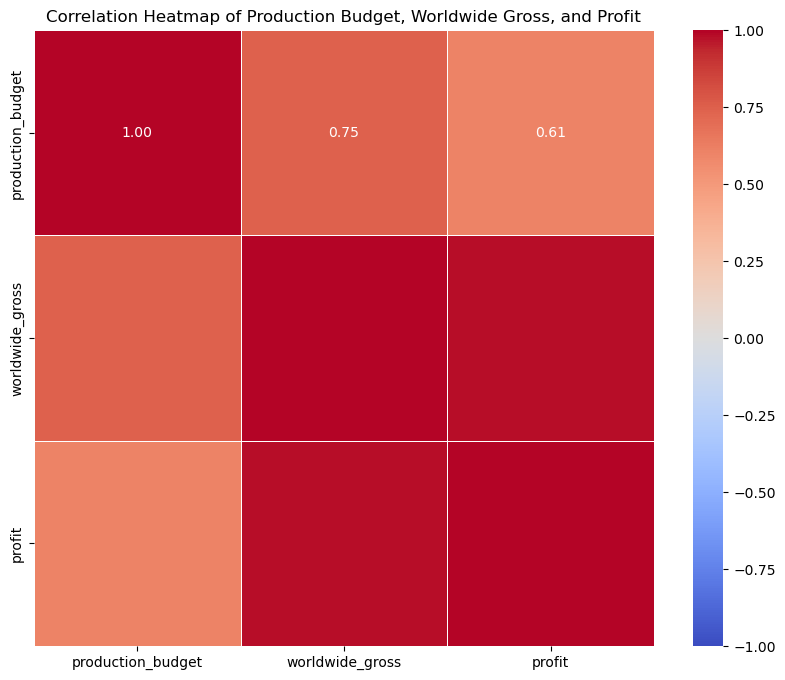

In [22]:
# Selecting the columns of interest
columns_of_interest = ['production_budget', 'worldwide_gross', 'profit']

# Creating a subset of the DataFrame with the specified columns
Heatmap_df = TN_df[columns_of_interest]

# Computing the correlation matrix
correlation_matrix = Heatmap_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Production Budget, Worldwide Gross, and Profit')
plt.show()

Production Budget vs. Worldwide Gross:<br>
Production budget and worldwide gross show a high positive correlation of approximately 0.75.
This means that as the production budget increases, the worldwide gross tends to increase as well. In other words, investing more in production often leads to higher global revenue.<br>
Worldwide Gross vs. Profit:<br>
Worldwide gross and profit display an even stronger positive correlation of approximately 0.98.
This suggests that higher worldwide gross is strongly associated with higher profit. When a film performs well globally, it tends to generate more profit.<br>
Production Budget vs. Profit:<br>
There’s a moderate positive correlation of approximately 0.61 between production budget and profit.
Increasing the production budget may lead to increased profits due to this association.

# Statistical Analysis

In this section, we apply statistical techniques to derive insights from our dataset. We use descriptive statistics like mean, median, variance, and standard deviation to summarize the data's central tendency and dispersion. Inferential statistics, including hypothesis testing, confidence intervals, and regression analysis, help us make predictions or generalizations about a population based on our sample. This analysis will help validate our findings, identify significant patterns, and supports data-driven decision-making.

# Hypothesis Testing

## 1.Movies released in summer months (May, June, July) have higher profits than movies released in other months.

Investigating this hypothesis will help us determine if there's a significant financial advantage to summer releases.

### Statitng the Null and Alternative hypothesis
Null Hypothesis (H₀): There is no significant difference in movie profits between summer months (May, June, July) and other months.<br>
Alternative Hypothesis (H₁): There is a significant difference in movie profits between summer and non-summer months.

T-statistic: 11.956893384010465
P-value: 1.551636561718069e-32
Reject Null Hypothesis: There is no significant difference in movie profits between summer months (May, June, July) and other months.


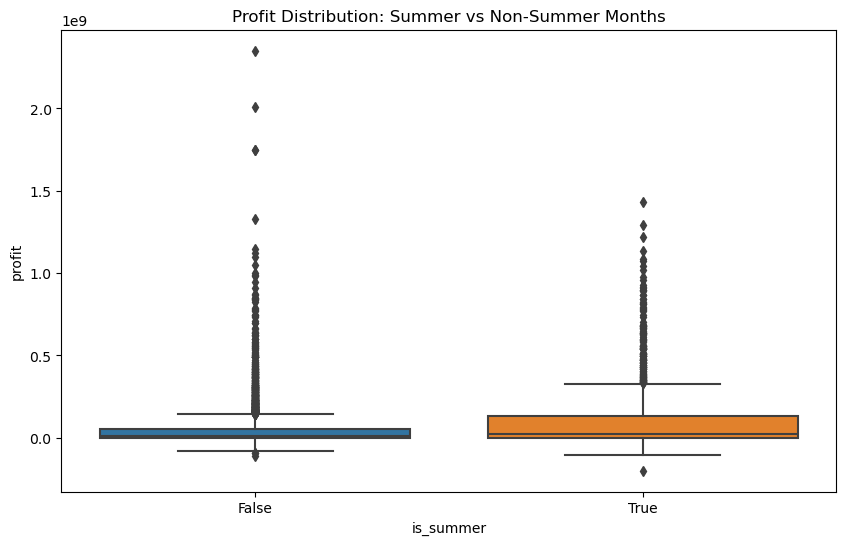

In [23]:
# Splitting the dataframe into a subset for summer months 
TN_df['is_summer'] = TN_df['release_month'].isin([5, 6, 7])

# Creating a subset of non summer months from the remaing months and extracting profit values for both subsets.

summer_profits = TN_df[TN_df['is_summer']]['profit']
non_summer_profits = TN_df[~TN_df['is_summer']]['profit']

# Performing a t-test to compare the mean profits between summer and non-summer movies.
t_stat, p_value = stats.ttest_ind(summer_profits, non_summer_profits)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Significance Level
a = 0.05
if p_value < a:
    print("Reject Null Hypothesis: There is no significant difference in movie profits between summer months (May, June, July) and other months.")
else:
    print("Accept Null Hypothesis: There is no significant difference in movie profits between summer and non-summer months.")

# Creating a  boxplot to visualize the profit distribution for both categories.
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_summer', y='profit', data=TN_df)
plt.title('Profit Distribution: Summer vs Non-Summer Months')
plt.show()

Based on the analysis the difference in movie profits between summer and non-summer months is statistically significant.. From the box plot, we can see that the box for summer movies (True) is slightly higher than for non-summer movies (False). From both the t-test and the box plot visualisation we can infer that  Movie profits tend to be high in the months of May, June and July (summer).

## 2.Higher budget films result in higher profits.

A study into this hypothesis can help inform decision making about budget allocation.

## Stating the Null and Alternate Hypothesis

Null Hypothesis = Higher budget films result do not result in higher profits. (There is no linear relationship between production budget and profit.)<br>
Alternate Hypothesis = Higher budget films result in higher profits (There is a linear relationship between production budget and profit)

Pearson Correlation Coefficient: 0.6090596025065957
P-value: 0.0
Reject Null Hypothesis : There is no linear relationship between production budget and profit.


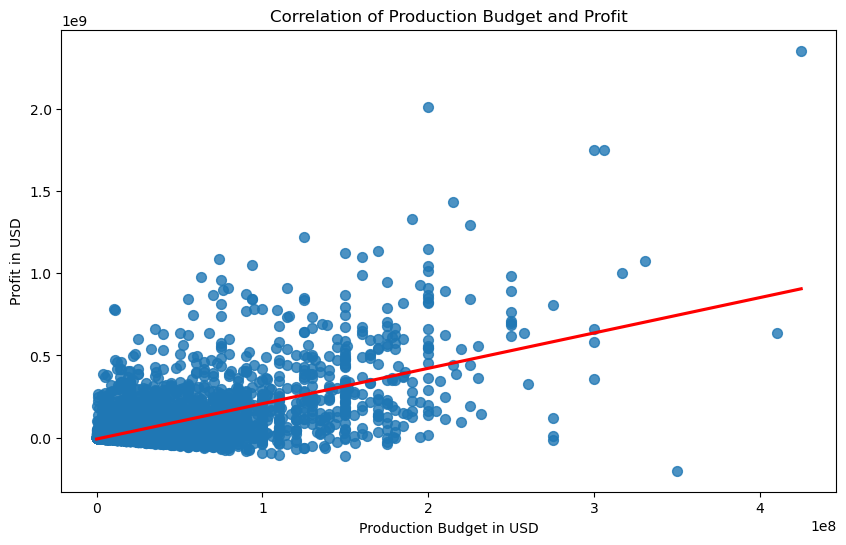

In [24]:
# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(TN_df['production_budget'], TN_df['profit'])
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# significance level
a = 0.05
if p_value < a:
    print("Reject Null Hypothesis : There is no linear relationship between production budget and profit.")
else:
    print("Accept Null Hypothesis: There is no linear relationship between production budget and profit..")

# Visualization: Regression plot of production budget vs. profit
plt.figure(figsize=(10, 6))
sns.regplot(data=TN_df, x='production_budget', y='profit', ci=None, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Correlation of Production Budget and Profit')
plt.xlabel('Production Budget in USD')
plt.ylabel('Profit in USD')
plt.show()

Pearson Correlation Coefficient: 0.6090596025065959 <br>
P-value: 0. <br> 
From the tesst the positive correlation coefficient indicates a positive relationship between production budget and profit. The p-value being less than 0.05 indicates the relationship is statistically significant. 
From the linear relationship seen on the plot, we can infer that an increase in production budget leads to an increase in profit.

# Linear Regression 

In this section, we use Linear Regression to model the relationship between a dependent variable and one or more independent variables. By fitting a linear equation to the data, we predict the dependent variable's value based on the independent variables. This helps will help us to understand relationships, identify trends, and make forecasts. 

In [25]:
# Select the feature and target variable
X = TN_df[['production_budget']]
y = TN_df['worldwide_gross']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear regression model of how production budget influences worldwide gross

Model 1: Predicting worldwide gross based on production budget
Mean squared error: 1.5991486331029718e+16
R-squared score: 0.5041078156339777


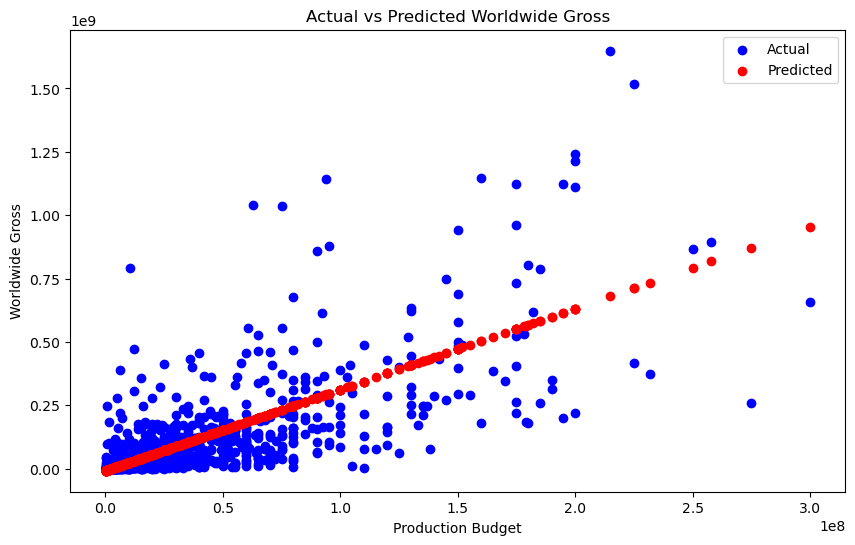

In [26]:
# Select the feature and target variable
X = TN_df[['production_budget']]
y = TN_df['worldwide_gross']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model1.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model 1: Predicting worldwide gross based on production budget")
print(f"Mean squared error: {mse}")
print(f"R-squared score: {r2}")

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Actual vs Predicted Worldwide Gross')
plt.legend()
plt.show()

 The model shows that there is a positive relationship between production budget and worldwide gross, but the relationship is not strong enough to account for all the variance in worldwide gross. This suggests that while production budget is an important factor, other variables also play significant roles in determining a movie's worldwide gross.